# Overall analysis for all symmetrical SST Perturbations at the 5 year mark

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
control = xr.open_dataset('/data/keeling/a/pappup2/a/CESM/cam5_new/CESM_output_data/atm/hist/cam5_new.cam.h0.0005-12.nc')
equator = xr.open_dataset('/data/keeling/a/mailes2/a/CESM_DATA/aqua_equator20wide/outputdata/atm/hist/aqua_equator20wide.cam.h0.0005-12.nc')
patch15 = xr.open_dataset('/data/keeling/a/pappup2/a/CESM/cam_15/CESM_output_data/atm/hist/cam_15.cam.h0.0005-12.nc')
patch30 = xr.open_dataset('/data/keeling/a/pappup2/a/CESM/cam_30/CESM_output_data/atm/hist/cam_30.cam.h0.0005-12.nc')
midlat = xr.open_dataset('/data/keeling/a/pappup2/a/CESM/cam_extratropic/CESM_output_data/atm/hist/cam_extratropic.cam.h0.0005-12.nc')
patch60 = xr.open_dataset('/data/keeling/a/pappup2/a/CESM/cam_60/CESM_output_data/atm/hist/cam_60.cam.h0.0005-12.nc')
patch75 = xr.open_dataset('/data/keeling/a/mailes2/a/CESM_DATA/aqua_75perturb/outputdata/atm/hist/aqua_75perturb.cam.h0.0005-12.nc')
pole = xr.open_dataset('/data/keeling/a/mailes2/a/CESM_DATA/aqua_poleperturb/outputdata/atm/hist/aqua_poleperturb.cam.h0.0005-12.nc')

## All SST Perturbations

Text(0.5, 1.0, 'delta SSTs')

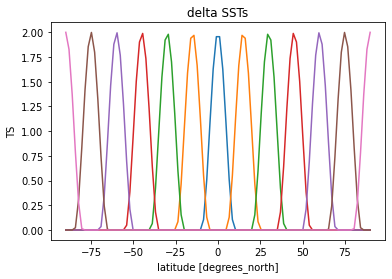

In [3]:
all_sets = [equator, patch15, patch30, midlat, patch60, patch75, pole]

#Delta SST

for num in range(7):
    SST = all_sets[num].TS.mean('lon')
    delta_SST = SST - control.TS.mean('lon')
    delta_SST.plot()
plt.title('delta SSTs')

## Top of Atmosphere Radiation

Text(0, 0.5, 'Radiation (W/m2)')

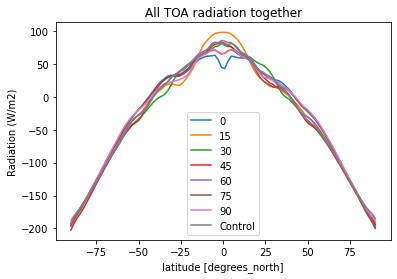

In [5]:
titles = ['0', '15', '30', '45', '60', '75', '90']
for num in range(7):
    TOA = all_sets[num].FSNT.mean('lon') - all_sets[num].FLNT.mean('lon')
    TOA.plot(label=titles[num])
control_TOA = control.FSNT.mean('lon') - control.FLNT.mean('lon')
control_TOA.plot(label='Control')
plt.legend()
plt.title('All TOA radiation together')
plt.ylabel('Radiation (W/m2)')

## Changes in TOA Radiation from a control SST

Text(0, 0.5, 'Radiation (W/m2)')

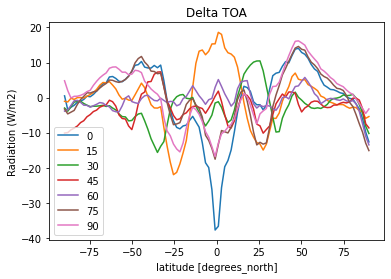

In [6]:
# delta TOA radiation

for num in range(7):
    TOA = all_sets[num].FSNT.mean('lon') - all_sets[num].FLNT.mean('lon')
    delta_TOA = TOA - control_TOA
    delta_TOA.plot(label=titles[num])
plt.legend()
plt.title('Delta TOA')
plt.ylabel('Radiation (W/m2)')

## Changes in temperature

Text(0.5, 0.01, 'Latitude')

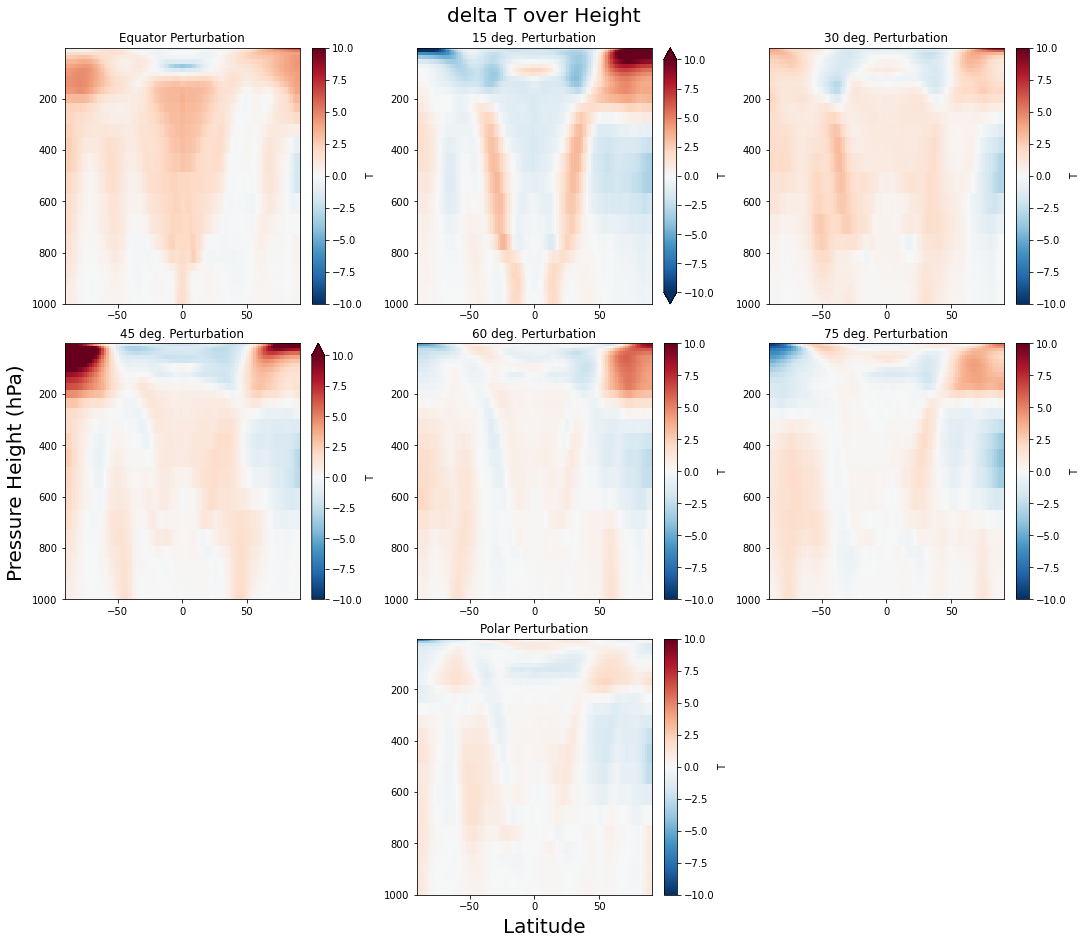

In [6]:
# delta T

titles_new = ['Equator Perturbation', '15 deg. Perturbation', '30 deg. Perturbation', '45 deg. Perturbation', 
              '60 deg. Perturbation', '75 deg. Perturbation', 'Polar Perturbation']

def plotting(num, ax, **kwargs):
    delta_T = all_sets[num].T.mean('lon') - control.T.mean('lon')
    a = delta_T.plot(ax = ax,
               vmin = -10 , vmax=10 , 
               cmap='RdBu_r', yincrease=False)
    ax.set(ylabel=None)
    ax.set(title=titles_new[num])
    ax.set(xlabel= None)
    return a

fig = plt.figure(figsize=(15,13), constrained_layout=True)
ax0 = fig.add_subplot(331)
a = plotting(0, ax0)
ax1 = fig.add_subplot(332)
plotting(1, ax1)
ax2 = fig.add_subplot(333)
plotting(2, ax2)
ax3 = fig.add_subplot(334)
plotting(3, ax3)
ax4 = fig.add_subplot(335)
plotting(4, ax4)
ax5 = fig.add_subplot(336)
plotting(5, ax5)
ax6 = fig.add_subplot(338)
plotting(6, ax6)
fig.suptitle('delta T over Height', fontsize=20)
fig.supylabel('Pressure Height (hPa)', fontsize=20)
fig.supxlabel('Latitude', fontsize=20)

## Example Figure with 15 and 75 degree patches

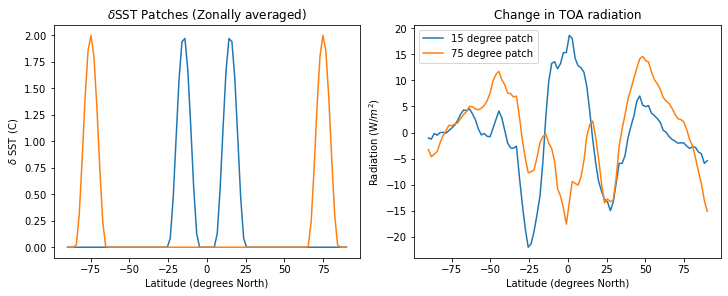

In [28]:
delta_15 = patch15.TS.mean('lon') - control.TS.mean('lon')
delta_75 = patch75.TS.mean('lon') - control.TS.mean('lon')
fig = plt.figure(figsize=(10, 4), constrained_layout=True)
ax0 = fig.add_subplot(121)
delta_15.plot(ax=ax0)
delta_75.plot(ax=ax0)
plt.title(r'$\delta$SST Patches (Zonally averaged)')
plt.ylabel(r'$\delta$ SST (C)')
plt.xlabel('Latitude (degrees North)')

toa_15 = patch15.FSNT.mean('lon') - patch15.FLNT.mean('lon')
toa_75 = patch75.FSNT.mean('lon') - patch75.FLNT.mean('lon')
dtoa_15 = toa_15 - control_TOA
dtoa_75 = toa_75 - control_TOA
ax1 = fig.add_subplot(122)
dtoa_15.plot(ax=ax1, label='15 degree patch')
dtoa_75.plot(ax=ax1, label='75 degree patch')
plt.title('Change in TOA radiation')
plt.ylabel(r'Radiation (W/$m^{2}$)')
plt.xlabel('Latitude (degrees North)')
plt.legend()
